## Code on Differential Evolution 

In [35]:
import numpy as np

def de(fobj, bounds, mut=0.8, crossp=0.7, popsize=20, its=1000):
    dimensions = len(bounds)
    pop = np.random.rand(popsize, dimensions)
    min_b, max_b = np.asarray(bounds).T
    diff = np.fabs(min_b - max_b)
    pop_denorm = min_b + pop * diff
    fitness = np.asarray([fobj(ind) for ind in pop_denorm])
    best_idx = np.argmin(fitness)
    best = pop_denorm[best_idx]
    for i in range(its):
        for j in range(popsize):
            idxs = [idx for idx in range(popsize) if idx != j]
            a, b, c = pop[np.random.choice(idxs, 3, replace = False)]
            mutant = np.clip(a + mut * (b - c), 0, 1)
            cross_points = np.random.rand(dimensions) < crossp
            if not np.any(cross_points):
                cross_points[np.random.randint(0, dimensions)] = True
            trial = np.where(cross_points, mutant, pop[j])
            trial_denorm = min_b + trial * diff
            f = fobj(trial_denorm)
            if f < fitness[j]:
                fitness[j] = f
                pop[j] = trial
                if f < fitness[best_idx]:
                    best_idx = j
                    best = trial_denorm
        yield best, fitness[best_idx]

In [38]:
## same thing in a different way. 

fobj = lambda x: sum(x**2)/len(x)

# def fobj(x):
#   value = 0
#   for i in range(len(x)):
#       value += x[i]**2
#   return value / len(x)

In [39]:
# examples of functions to minimize
it = list(de(lambda x: x**2, bounds=[(-100, 100)]))

print(it[-1])

(array([0.]), array([0.]))


In [7]:
!pip install yabox

In [15]:
%matplotlib inline

from yabox import DE, PDE
import numpy as np

# Imports required for 3d animations
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation, rcParams
from IPython.display import HTML

In [16]:
# There is a bug in matplotlib that prevents the use of ffmpeg and avconv!
# https://github.com/matplotlib/matplotlib/pull/8743

avail_writers = matplotlib.animation.writers.list()
    
# Functions to generate 3d animations

def display_animation(anim):
    plt.close(anim._fig)
    return HTML(anim.to_html5_video())


def generate_video(problem, algorithm, figsize=(12, 8), frames=100, interval=100):
    # Try to use tqdm to show progress
    use_tqdm = True
    try:
        from tqdm.auto import tqdm
    except:
        use_tqdm = False
    
    figure = plt.figure(figsize=figsize)
    ax = Axes3D(figure)
    problem.plot3d(ax3d=ax)
    minz = min(ax.get_zlim())
    it = algorithm.geniterator()
    if use_tqdm:
        it = iter(tqdm(it, total=frames))

    def animate(i):
        ax.clear()
        ax.autoscale(enable=False)
        problem.plot3d(ax3d=ax)
        status = next(it)
        population = status.population
        P = algorithm.denormalize(population)
        fitness = status.fitness
        idx = status.best_idx
        PT = P.T
        # Individuals
        ax.scatter(PT[0], PT[1], fitness, s=30, c='#930039', marker='o', depthshade=False, zorder=999)
        # Shadow projections
        ax.scatter(PT[0], PT[1], np.full_like(PT[0], minz), alpha=0.5, s=50, c='black', marker='o', 
                   edgecolors='none', depthshade=False, zorder=999)
        
    anim = animation.FuncAnimation(figure, animate, frames=frames, interval=interval, blit=False)
    return anim

In [34]:
# from yabox.problems import BaseProblem
# from yabox import DE

problem = list(DE(lambda x: sum(x**2)/len(x), bounds=[(-100, 100)] * 32))
# problem_2 = DE(lambda x: x**2 / len(x), bounds=[(-100, 100)] * 32).solve()

# problem.plot3d()
print(problem)
# result = list(DE(lambda x: x**2 / len(x), bounds=[(-100, 100)] * 32))
# BaseProblem(problem).plot2d()

TypeError: 'DE' object is not iterable

In [41]:
# result = list(de(lambda x: x**2 / len(x), bounds=[(-100, 100)] * 32))
# print(result[-1])

In [42]:
# result = list(de(lambda x: x**2 / len(x), bounds=[(-100, 100)] * 32, its=3000))

steps to algorithm
given some funtion(f) and bounds  
1. create population from random 
2. covert pop valuse to be within the selected bounds [] (denormalization)
2. evaluate these population vector with the objective function 
3. Mutate and 

Polynomial curve fitting example

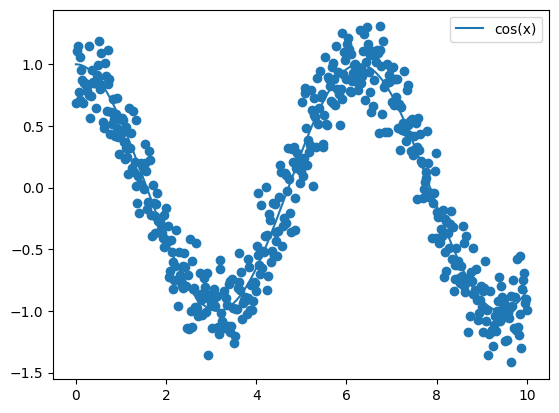

In [43]:
x = np.linspace(0, 10, 500)
y = np.cos(x) + np.random.normal(0, 0.2, 500)
plt.scatter(x, y)
plt.plot(x, np.cos(x), label='cos(x)')
plt.legend()

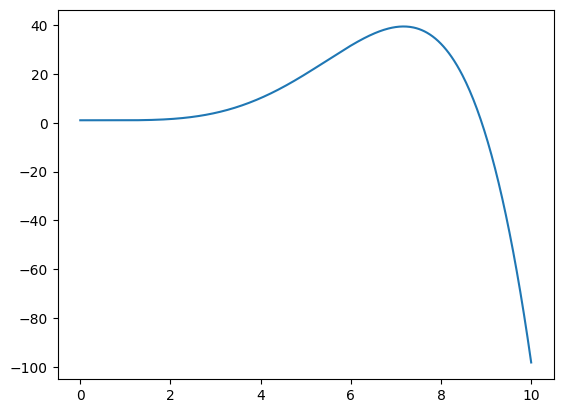

In [46]:
def fmodel(x, w):
    return w[0] + w[1]*x + w[2] * x**2 + w[3] * x**3 + w[4] * x**4 + w[5] * x**5
plt.plot(x, fmodel(x, [1.0, -0.01, 0.01, -0.1, 0.1, -0.01]))

In [47]:
def rmse(w):
    y_pred = fmodel(x, w)
    return np.sqrt(sum((y - y_pred)**2) / len(y))

In [49]:
result = list(de(rmse, [(-5, 5)] * 6, its=2000))

In [50]:
result

[(array([ 2.48846391, -0.19082013,  2.01226638, -1.781378  , -0.78525394,
          0.15426032]),
  1532.3238232114559),
 (array([-2.45802565,  0.27377265,  1.51272007,  3.35622854,  1.87330023,
         -0.22979778]),
  1096.2181937000119),
 (array([-2.45802565,  0.27377265,  1.51272007,  3.35622854,  1.87330023,
         -0.22979778]),
  1096.2181937000119),
 (array([-2.45802565,  0.27377265,  1.51272007,  3.35622854,  1.87330023,
         -0.22979778]),
  1096.2181937000119),
 (array([-2.45802565,  0.27377265,  1.51272007,  3.35622854,  1.87330023,
         -0.22979778]),
  1096.2181937000119),
 (array([-2.45802565,  0.27377265,  1.51272007,  3.35622854,  1.87330023,
         -0.22979778]),
  1044.3720381750888),
 (array([-2.45802565,  0.27377265,  1.51272007,  3.35622854,  1.87330023,
         -0.22979778]),
  1044.3720381750888),
 (array([-2.45802565,  0.27377265,  1.51272007,  3.35622854,  1.87330023,
         -0.22979778]),
  1044.3720381750888),
 (array([-2.45802565,  0.2737726

In [ ]:
# plt.scatter(x, y)
# plt.plot(x, np.cos(x), label='cos(x)')

# mutation schemas - 

Rand/1: xmut=xr1+F(xr2−xr3)

Rand/2: xmut=xr1+F(xr2−xr3+xr4−xr5)

Best/1: xmut=xbest+F(xr2−xr3)

Best/2: xmut=xbest+F(xr2−xr3+xr4−xr5)

Rand-to-best/1: xmut=xr1+F1(xr2−xr3)+F2(xbest−xr1)

# Crossover schemas

1. Binomial

2. Expoential